# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return (x**2)*numpy.sin(x)

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [29]:
def g(x):
    '''nalytical integral of f(x).'''
    return (2-x**2)*numpy.cos(x) + 2*x*numpy.sin(x) - 2

Check your solution with the same numpy array:

In [5]:
assert g(0) == 0.

In [6]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax) - g(xmin)

Check your analytic function:

In [8]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [31]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    w = (xmax-xmin)/N
    return sum(w*(f(xmin+i*w) + 4*f(xmin+(i+0.5)*w) + f(xmin+(i+1)*w))/6 
               for i in range(N))

Make sure you have implemented Simpson's rule correctly:

In [10]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [11]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


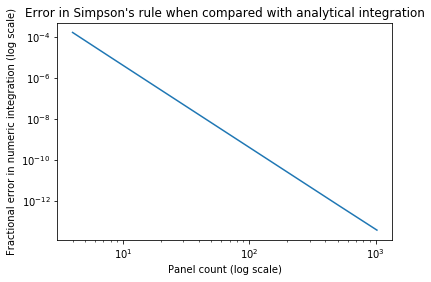

In [33]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]#, *[1024*x for x in range(2, 16)]]  # Panel numbers to use

result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
diffs = [abs(result_analytic-integrate_numeric(x0, x1, N))/result_analytic 
         for N in panel_counts]

plt.figure()
plt.loglog(panel_counts, diffs)
plt.title("Error in Simpson's rule when compared with analytical integration")
plt.xlabel("Panel count (log scale)")
plt.ylabel("Fractional error in numeric integration (log scale)")
plt.show()


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The accuracy of the numerical method increases with the number of panels, with the order of about $N^{-4}$. If the number of panels becomes too large, because floating point precision errors place a floor on how small the error can become, the error hovers randomly around about $10^{-15}$. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The error would still decrease, but it would be with order $N^{-2}$, as opposed to $N^{-4}$ for Simpson's rule, where $N$ is the number of strips used in the integration.